### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


PART A : Prerequisite for linear regression implementation
1.Create  an  array  x  =  [1, 1,  2,  3,  4,  3,  4,  6,  4]  using  numpy.  Calculate  a  function h(x)=t0+t1*x, where t0=1.2 and t1=0.5, for all values of x and plot a graph with x on one axis and h(x)on another axis. 

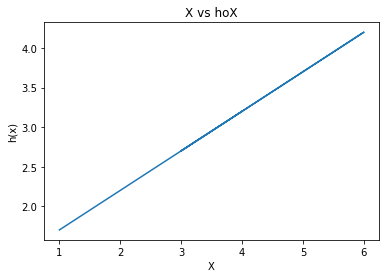

In [2]:
X = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4]) 
hoX = []
t0 = 1.2; t1=0.5

for i in X:
    hoX.append(t0+t1*i)
plt.title("X vs hoX")
plt.xlabel("X")
plt.ylabel("h(x)")
plt.plot(X, hoX)

2.Create two arrays A and B with the following values using numpy array. Let (Ai,Bi) represent a data point with i th element of A and B. A = [1, 1, 2, 3, 4, 3, 4, 6, 4] B = [2, 1,  0.5,  1,  3,  3,  2,  5,  4]  Find  out  the  dot  product  of  the  vectors.  [Hint  use  numpy np.dot(a,b)]

In [3]:
A = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
B = np.array([2, 1, 0.5, 1, 3, 3, 2, 5, 4])
Dp = np.dot(B,A)
Dp

82.0

3.Plot a graph marking the data points (Ai,Bi) with A on the X-axis and B on the Y-axis.

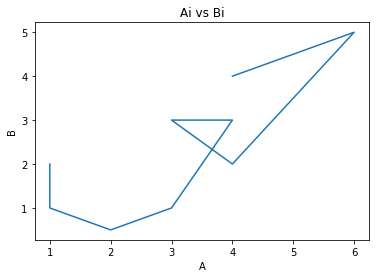

In [4]:
plt.title("Ai vs Bi")
plt.xlabel("A")
plt.ylabel("B")
plt.plot(A, B)

4.Calculate Mean Square Error (MSE) of A and B with the formulae where n is the no: of sample data points. 

In [5]:
mse = mean_squared_error(A, B)
mse

1.4722222222222223

Modify the above equation with the following cost function. Implement as a function with prototype def compute_cost_function(n,t1,A,B):

0.7916666666666666


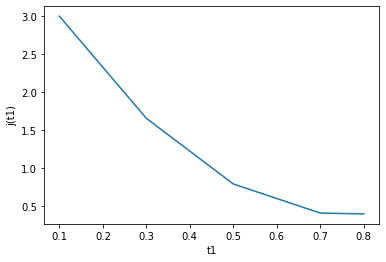

In [7]:
def compute_cost_function(n, t1, A, B):
    sum_square_cost = np.square(np.dot(A, t1) - B).sum()
    cost = sum_square_cost/(2*n)
    return cost
n = len(A)
print(compute_cost_function(n, 0.5, A, B))
t1_values = [0.1,0.3,0.5,0.7,0.8]
cost = []
for t1 in t1_values:
    cost.append(compute_cost_function(n, t1, A, B))
plt.xlabel('t1')
plt.ylabel('j(t1)')
plt.plot(t1_values, cost)
    

PART B : 
- Linear Regression Implementation 
 
 1.Linear regression with one variable.
   
a. Generate a new data set from student scores with one feature studytimeand output variable average grade = (G1+G2+G3)/3

### load the dataset

In [12]:
data = pd.read_csv('./Datas/student.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [38]:
Grade = data.iloc[:, [30,31,32]].mean(axis=1)
study_time = data[['studytime']]
Grade

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64

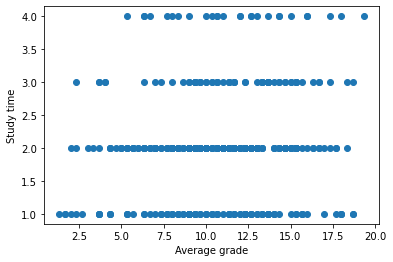

In [37]:
plt.xlabel('Average grade')
plt.ylabel('Study time')
plt.scatter(Grade, study_time)


In [31]:
X = study_time
Y = Grade

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, test_size=0.2)


In [45]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
y_pred
print(lr.coef_)
print(lr.intercept_)


[0.77702703]
9.123873873873874


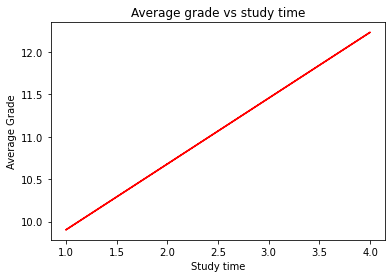

In [48]:

plt.title("Average grade vs study time")
plt.xlabel("Study time")
plt.ylabel("Average Grade")
plt.plot(X_train, lr.coef_*X_train+lr.intercept_, '-r', 
        label='Intercept: 9.12 \nSlope: 0.77')